<a href="https://colab.research.google.com/github/junyeog/deep-learning-project/blob/main/gender_classifier_DFE_791531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
try:
    import lightgbm as lgb
except ImportError:
    lgb = None
    from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, make_scorer
import warnings
warnings.filterwarnings('ignore')
try:
    import lightgbm as lgb
except ImportError:
    lgb = None
    from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('stopwords')
# nltk.download('wordnet')

from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras import regularizers

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/project/gender-classifier-DFE-791531.csv", encoding='latin1')


--- 데이터 기본 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  link_color             20050 non-null  object 
 14  name                   20050 non-nu

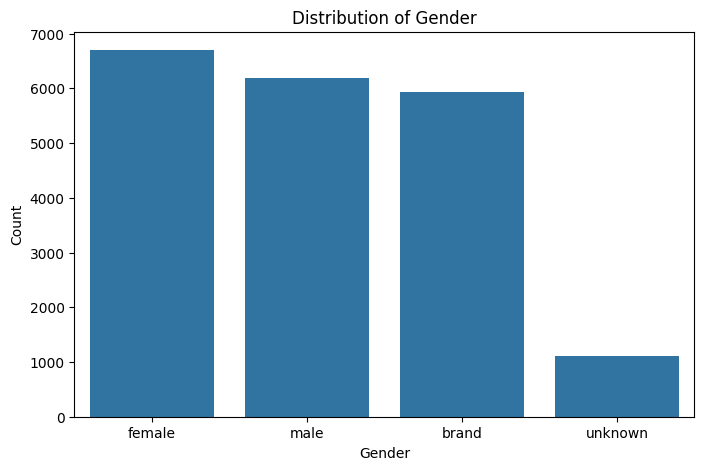

In [ ]:
# 데이터 기본 정보 확인
print("\n--- 데이터 기본 정보 ---")
print(df.info())

# 데이터 상위 5개 행 확인
print("\n--- 데이터 상위 5개 행 ---")
print(df.head())

# 기술 통계량 확인
print("\n--- 기술 통계량 ---")
print(df.describe(include='all')) # 모든 컬럼 포함

# 결측치 확인
print("\n--- 결측치 확인 ---")
print(df.isnull().sum())

# 'gender' 컬럼의 유니크 값 및 분포 확인 (타겟 변수)
print("\n--- 'gender' 컬럼 유니크 값 ---")
print(df['gender'].unique())
print("\n--- 'gender' 컬럼 분포 ---")
print(df['gender'].value_counts())
print("\n--- 'gender' 컬럼 분포 (비율) ---")
print(df['gender'].value_counts(normalize=True))

# 성별 분포 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df, order=df['gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
df_filtered = df[df['gender'].isin(['male', 'female'])].copy() # 'brand', 'unknown' 등 제외
print(f"\n성별 필터링 전 데이터 수: {len(df)}")
print(f"성별 필터링 후 데이터 수: {len(df_filtered)}")
print(f"필터링 후 'gender' 컬럼 분포:\n{df_filtered['gender'].value_counts(normalize=True)}")

le = LabelEncoder()
df_filtered['gender_encoded'] = le.fit_transform(df_filtered['gender'])
print(f"인코딩된 성별 매핑: {list(le.classes_)} -> {le.transform(le.classes_)}")

# 2. 결측치 처리 (텍스트 컬럼은 빈 문자열로 채움)
df_filtered['text'].fillna('', inplace=True)
df_filtered['description'].fillna('', inplace=True)

df_filtered['fav_number'].fillna(df_filtered['fav_number'].median(), inplace=True)
df_filtered['retweet_count'].fillna(df_filtered['retweet_count'].median(), inplace=True)
df_filtered['tweet_count'].fillna(df_filtered['tweet_count'].median(), inplace=True)



성별 필터링 전 데이터 수: 20050
성별 필터링 후 데이터 수: 12894
필터링 후 'gender' 컬럼 분포:
gender
female    0.519622
male      0.480378
Name: proportion, dtype: float64
인코딩된 성별 매핑: ['female', 'male'] -> [0 1]


In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)
print("\n--- 텍스트 데이터 (text, description) 전처리 중... ---")
df_filtered['cleaned_text'] = df_filtered['text'].apply(preprocess_text)
df_filtered['cleaned_description'] = df_filtered['description'].apply(preprocess_text)
print("텍스트 데이터 전처리 완료!")

print("\n--- 전처리된 텍스트 예시 ---")
print(f"원본 트윗: {df_filtered['text'].iloc[0]}")
print(f"전처리 후 트윗: {df_filtered['cleaned_text'].iloc[0]}\n")
print(f"원본 설명: {df_filtered['description'].iloc[0]}")
print(f"전처리 후 설명: {df_filtered['cleaned_description'].iloc[0]}\n")


--- 텍스트 데이터 (text, description) 전처리 중... ---
텍스트 데이터 전처리 완료!

--- 전처리된 텍스트 예시 ---
원본 트윗: Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
전처리 후 트윗: robbie e responds critic win eddie edward

원본 설명: i sing my own rhythm.
전처리 후 설명: sing rhythm




성별 필터링 전 데이터 수: 20050
성별 필터링 후 데이터 수: 12894
필터링 후 'gender' 컬럼 분포:
gender
female    0.519622
male      0.480378
Name: proportion, dtype: float64
인코딩된 성별 매핑: ['female', 'male'] -> [0 1]

--- 텍스트 데이터 (text, description) 전처리 중... ---
텍스트 데이터 전처리 완료!

--- 전처리된 텍스트 예시 ---
원본 트윗: Robbie E Responds To Critics After Win Against Eddie Edwards In The #WorldTitleSeries https://t.co/NSybBmVjKZ
전처리 후 트윗: robbie e responds critic win eddie edward

원본 설명: i sing my own rhythm.
전처리 후 설명: sing rhythm


최종 특징 매트릭스 X_combined 형태: (12894, 10005)
훈련 세트 크기: (10315, 10005)
테스트 세트 크기: (2579, 10005)

--- 여러 모델 훈련 및 평가 시작 ---

모델: Logistic Regression 훈련 중...
  정확도 (Accuracy): 0.6677
  정밀도 (Precision): 0.6649
  재현율 (Recall): 0.6215
  F1-Score: 0.6425
  ROC-AUC Score: 0.7321

모델: Decision Tree 훈련 중...
  정확도 (Accuracy): 0.6068
  정밀도 (Precision): 0.5941
  재현율 (Recall): 0.5730
  F1-Score: 0.5834
  ROC-AUC Score: 0.6058

모델: Random Forest 훈련 중...
  정확도 (Accuracy): 0.6661
  정밀도 (Precision): 0.6913
  재현율 (Recall): 0.55

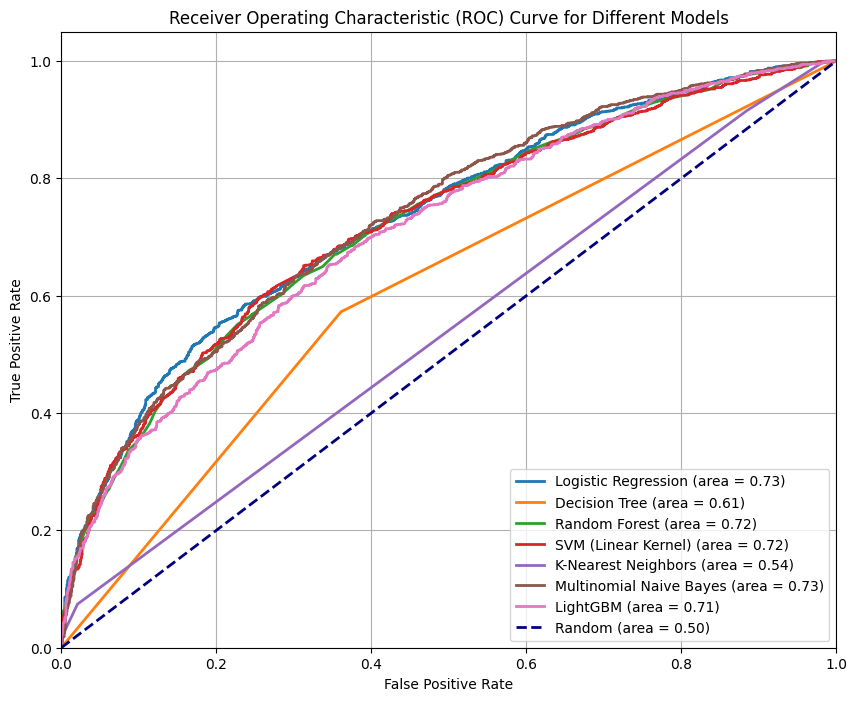

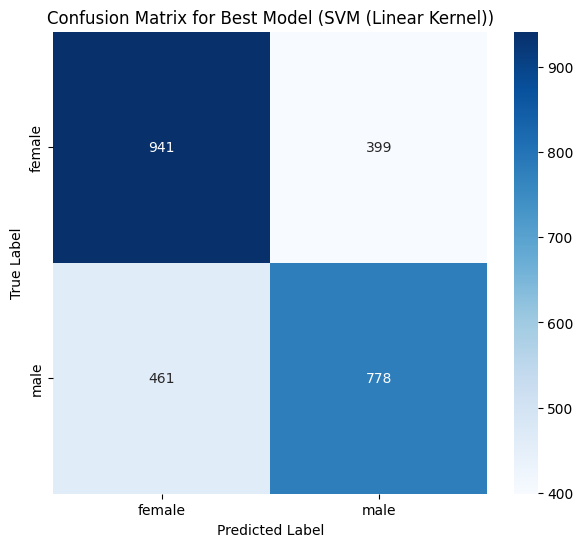

In [ ]:

df_filtered = df[df['gender'].isin(['male', 'female'])].copy() # 'brand', 'unknown' 등 제외
print(f"\n성별 필터링 전 데이터 수: {len(df)}")
print(f"성별 필터링 후 데이터 수: {len(df_filtered)}")
print(f"필터링 후 'gender' 컬럼 분포:\n{df_filtered['gender'].value_counts(normalize=True)}")

le = LabelEncoder()
df_filtered['gender_encoded'] = le.fit_transform(df_filtered['gender'])
print(f"인코딩된 성별 매핑: {list(le.classes_)} -> {le.transform(le.classes_)}")

# 2. 결측치 처리 (텍스트 컬럼은 빈 문자열로 채움)
df_filtered['text'].fillna('', inplace=True)
df_filtered['description'].fillna('', inplace=True)

# 3. 텍스트 데이터 정제 함수 정의
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

print("\n--- 텍스트 데이터 (text, description) 전처리 중... ---")
df_filtered['cleaned_text'] = df_filtered['text'].apply(preprocess_text)
df_filtered['cleaned_description'] = df_filtered['description'].apply(preprocess_text)
print("텍스트 데이터 전처리 완료!")

print("\n--- 전처리된 텍스트 예시 ---")
print(f"원본 트윗: {df_filtered['text'].iloc[0]}")
print(f"전처리 후 트윗: {df_filtered['cleaned_text'].iloc[0]}\n")
print(f"원본 설명: {df_filtered['description'].iloc[0]}")
print(f"전처리 후 설명: {df_filtered['cleaned_description'].iloc[0]}\n")

# 4. 텍스트 특징 결합 (text + description)
df_filtered['combined_text'] = df_filtered['cleaned_text'] + " " + df_filtered['cleaned_description']

# 5. 수치형 특징 공학 및 준비
df_filtered['created'] = pd.to_datetime(df_filtered['created'], errors='coerce')
df_filtered['tweet_created'] = pd.to_datetime(df_filtered['tweet_created'], errors='coerce')

current_time = df_filtered['tweet_created'].max()
df_filtered['account_age_days'] = (current_time - df_filtered['created']).dt.days.fillna(0)
df_filtered['tweet_age_days'] = (current_time - df_filtered['tweet_created']).dt.days.fillna(0)



text_features = df_filtered['combined_text']
numerical_features_to_use = ['fav_number', 'retweet_count', 'tweet_count',
                             'account_age_days', 'tweet_age_days']

for col in numerical_features_to_use:
    if col in df_filtered.columns:
        df_filtered[col].fillna(df_filtered[col].median(), inplace=True)
    else:
        print(f"경고: {col} 컬럼이 데이터셋에 없습니다.")


X_text = text_features
X_numerical = df_filtered[numerical_features_to_use]
y = df_filtered['gender_encoded']

# 7. 텍스트 특징 벡터화 (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))
X_tfidf = tfidf_vectorizer.fit_transform(X_text)

# 8. 수치형 특징 스케일링 (MinMaxScaler 사용) <--- 이 부분이 변경되었습니다!
scaler = MinMaxScaler() # <--- MinMaxScaler로 변경
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_features_to_use, index=X_numerical.index)

# 9. 특징 결합 (텍스트 벡터 + 수치형 특징)
from scipy.sparse import hstack
X_combined = hstack([X_tfidf, X_numerical_scaled_df])

print(f"\n최종 특징 매트릭스 X_combined 형태: {X_combined.shape}")

# 훈련 세트와 테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42, stratify=y)
print(f"훈련 세트 크기: {X_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}")

# --- 여러 모델 훈련 및 평가 ---

models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
}

if lgb:
    models['LightGBM'] = lgb.LGBMClassifier(random_state=42)
else:
    models['Gradient Boosting'] = GradientBoostingClassifier(random_state=42)

results = []
roc_curves = {}

print("\n--- 여러 모델 훈련 및 평가 시작 ---")

for name, model in models.items():
    print(f"\n모델: {name} 훈련 중...")


    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr)
    except AttributeError:
        y_prob = None
        roc_auc = np.nan
        print(f"경고: {name}은 predict_proba를 지원하지 않아 ROC-AUC를 계산할 수 없습니다.")


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    print(f"  정확도 (Accuracy): {accuracy:.4f}")
    print(f"  정밀도 (Precision): {precision:.4f}")
    print(f"  재현율 (Recall): {recall:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"  ROC-AUC Score: {roc_auc:.4f}")
    else:
        print(f"  ROC-AUC Score: N/A")

print("\n--- 모든 모델 평가 완료 ---")

results_df = pd.DataFrame(results).set_index('Model').sort_values(by='F1-Score', ascending=False)
print("\n--- 모델별 성능 요약 ---")
print(results_df.round(4))

# 모든 모델의 ROC 곡선 시각화
plt.figure(figsize=(10, 8))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {results_df.loc[name, "ROC-AUC"]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random (area = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different M odels')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

best_model_name = results_df.index[0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(7, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix for Best Model ({best_model_name})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

TensorFlow Version: 2.18.0
Num GPUs Available: 0
경고: GPU가 인식되지 않았습니다. CPU로 학습이 진행됩니다.
--- 데이터 기본 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               20050 non-null  int64  
 1   _golden                20050 non-null  bool   
 2   _unit_state            20050 non-null  object 
 3   _trusted_judgments     20050 non-null  int64  
 4   _last_judgment_at      20000 non-null  object 
 5   gender                 19953 non-null  object 
 6   gender:confidence      20024 non-null  float64
 7   profile_yn             20050 non-null  object 
 8   profile_yn:confidence  20050 non-null  float64
 9   created                20050 non-null  object 
 10  description            16306 non-null  object 
 11  fav_number             20050 non-null  int64  
 12  gender_gold            50 non-null     object 
 13  li

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 128)            │     1,280,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,289,089 (4.92 MB)

 Trainable params: 1,289,089 (4.92 MB)

 Non-trainable params: 0 (0.00 B)


--- Twitter Gender Classification (MLP) 모델 학습 시작 ---
Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5168 - loss: 1.1477
Epoch 1: val_accuracy improved from -inf to 0.52036, saving model to best_twitter_gender_mlp_model.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.5169 - loss: 1.1460 - val_accuracy: 0.5204 - val_loss: 0.7808 - learning_rate: 5.0000e-04
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5605 - loss: 0.7601
Epoch 2: val_accuracy improved from 0.52036 to 0.60993, saving model to best_twitter_gender_mlp_model.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5606 - loss: 0.7600 - val_accuracy: 0.6099 - val_loss: 0.7240 - learning_rate: 5.0000e-04
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6330 - loss: 0.7140
Epoch 3: val_accuracy improved from 0.60993 to 0.63319, saving model to best_twitter_gender_mlp_model.keras
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.6330 - loss: 

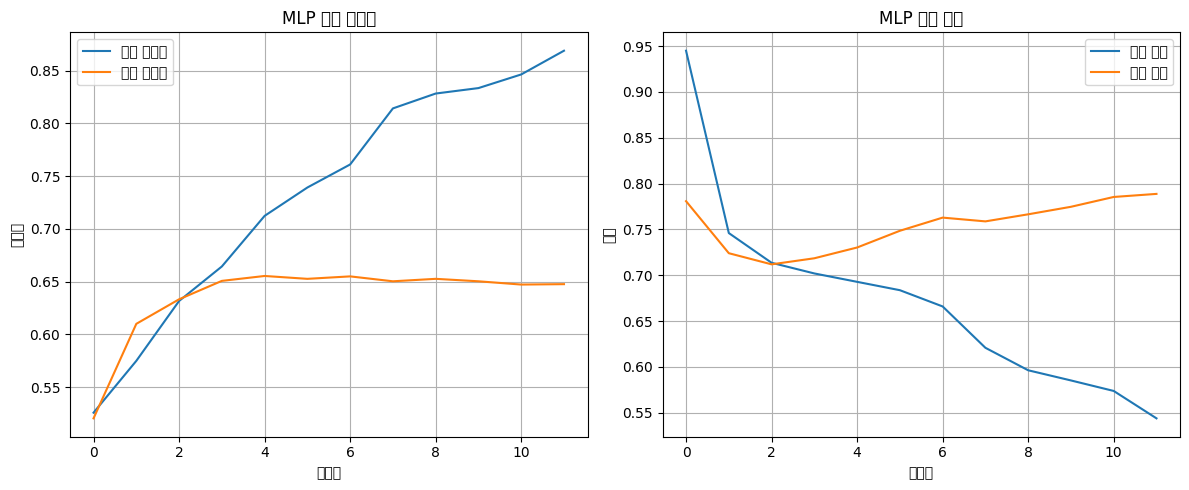


Twitter User Gender Classification 딥러닝 모델 학습 및 평가가 완료되었습니다!
모델은 'best_twitter_gender_mlp_model.keras' 파일로 저장되었습니다.


In [ ]:
try:
    print("--- 데이터 기본 정보 ---")
    df.info()
    print("\n--- 데이터 상위 5개 행 ---")
    print(df.head())
    print("\n--- 기술 통계량 ---")
    print(df.describe(include='all'))
    print("\n--- 결측치 확인 ---")
    print(df.isnull().sum())
    print("\n--- 'gender' 컬럼 유니크 값 ---")
    print(df['gender'].unique())
    print("\n--- 'gender' 컬럼 분포 ---")
    print(df['gender'].value_counts())
    print("\n--- 'gender' 컬럼 분포 (비율) ---")
    print(df['gender'].value_counts(normalize=True))

    # 1. 'gender' 컬럼 필터링 및 인코딩 (male, female만 사용)
    df_filtered = df[df['gender'].isin(['male', 'female'])].copy()
    print(f"\n성별 필터링 전 데이터 수: {len(df)}")
    print(f"성별 필터링 후 데이터 수: {len(df_filtered)}")
    print(f"필터링 후 'gender' 컬럼 분포:\n{df_filtered['gender'].value_counts(normalize=True)}")

    le = LabelEncoder()
    df_filtered['gender_encoded'] = le.fit_transform(df_filtered['gender'])
    print(f"인코딩된 성별 매핑: {list(le.classes_)} -> {le.transform(le.classes_)}")

    # 2. 결측치 처리 (텍스트 컬럼은 빈 문자열로 채움)
    df_filtered['text'].fillna('', inplace=True)
    df_filtered['description'].fillna('', inplace=True)
    df_filtered['fav_number'].fillna(df_filtered['fav_number'].median(), inplace=True)
    df_filtered['retweet_count'].fillna(df_filtered['retweet_count'].median(), inplace=True)
    df_filtered['tweet_count'].fillna(df_filtered['tweet_count'].median(), inplace=True)

    # 3. 텍스트 데이터 정제 함수 정의
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    def preprocess_text(text):
        text = str(text).lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'@\w+|#\w+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\d+', '', text)
        tokens = text.split()
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)

    print("\n--- 텍스트 데이터 (text, description) 전처리 중... ---")
    df_filtered['cleaned_text'] = df_filtered['text'].apply(preprocess_text)
    df_filtered['cleaned_description'] = df_filtered['description'].apply(preprocess_text)
    print("텍스트 데이터 전처리 완료!")

    print("\n--- 전처리된 텍스트 예시 ---")
    print(f"원본 트윗: {df_filtered['text'].iloc[0]}")
    print(f"전처리 후 트윗: {df_filtered['cleaned_text'].iloc[0]}\n")
    print(f"원본 설명: {df_filtered['description'].iloc[0]}")
    print(f"전처리 후 설명: {df_filtered['cleaned_description'].iloc[0]}\n")

    # 4. 텍스트 특징 결합 (text + description)
    df_filtered['combined_text'] = df_filtered['cleaned_text'] + " " + df_filtered['cleaned_description']

    # 5. 수치형 특징 공학 및 준비
    df_filtered['created'] = pd.to_datetime(df_filtered['created'], errors='coerce')
    df_filtered['tweet_created'] = pd.to_datetime(df_filtered['tweet_created'], errors='coerce')

    current_time = df_filtered['tweet_created'].max() # 최신 트윗 생성 시간을 기준으로 나이 계산
    df_filtered['account_age_days'] = (current_time - df_filtered['created']).dt.days.fillna(0)
    df_filtered['tweet_age_days'] = (current_time - df_filtered['tweet_created']).dt.days.fillna(0)

    # 6. 특징 (X) 및 타겟 (y) 분리
    text_features = df_filtered['combined_text']
    numerical_features_to_use = ['fav_number', 'retweet_count', 'tweet_count',
                                 'account_age_days', 'tweet_age_days']

    # 사용하려는 수치형 컬럼의 결측치 처리 (만약 있다면)
    for col in numerical_features_to_use:
        if col in df_filtered.columns:
            df_filtered[col].fillna(df_filtered[col].median(), inplace=True)
        else:
            print(f"경고: {col} 컬럼이 데이터셋에 없습니다. (수치형 특징 사용 목록에 있지만)")

    X_text = text_features
    X_numerical = df_filtered[numerical_features_to_use]
    y = df_filtered['gender_encoded']

    # 7. 텍스트 특징 벡터화 (TF-IDF)
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english', ngram_range=(1,2))
    X_tfidf = tfidf_vectorizer.fit_transform(X_text)

    # 8. 수치형 특징 스케일링 (MinMaxScaler 사용)
    scaler = MinMaxScaler()
    X_numerical_scaled = scaler.fit_transform(X_numerical)
    # 스케일링 후 Pandas DataFrame으로 변환 (hstack을 위해)
    X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_features_to_use, index=X_numerical.index)

    # 9. 특징 결합 (텍스트 벡터 + 수치형 특징)
    X_combined = hstack([X_tfidf, X_numerical_scaled_df])

    print(f"\n최종 특징 매트릭스 X_combined 형태: {X_combined.shape}")

    # 훈련/검증/테스트 세트 분리
    X_combined_dense = X_combined.toarray()

    X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
        X_combined_dense, y, test_size=0.2, random_state=42, stratify=y
    )
    X_train_dl, X_val_dl, y_train_dl, y_val_dl = train_test_split(
        X_train_dl, y_train_dl, test_size=0.25, random_state=42, stratify=y_train_dl # 0.8 * 0.25 = 0.2
    )

    print(f"훈련 세트 크기 (DL): {X_train_dl.shape}")
    print(f"검증 세트 크기 (DL): {X_val_dl.shape}")
    print(f"테스트 세트 크기 (DL): {X_test_dl.shape}")

except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    print("예시 데이터로 딥러닝 모델 학습을 진행합니다.")
    # 예시 데이터 (테스트용, 실제 데이터와 컬럼 수 맞춤)
    # 텍스트 TF-IDF (10000) + 수치형 5개 = 10005개 특징
    input_dim = 10005 # 예시 특징의 개수 (실제 데이터의 총 특징 개수)
    X_train_dl = np.random.rand(1000, input_dim)
    y_train_dl = np.random.randint(0, 2, size=(1000,))
    X_val_dl = np.random.rand(200, input_dim)
    y_val_dl = np.random.randint(0, 2, size=(200,))
    X_test_dl = np.random.rand(200, input_dim)
    y_test_dl = np.random.randint(0, 2, size=(200,))

    # input_dim이 설정되지 않았다면 (예시 데이터의 경우)
    if 'input_dim' not in locals():
        input_dim = X_train_dl.shape[1]

# --- 2. 딥러닝 모델 구축 (MLP - Multi-Layer Perceptron) ---
model_mlp = Sequential([
    # 첫 번째 은닉층
    Dense(128, activation='relu', input_shape=(dl_input_dim,),
          kernel_regularizer=regularizers.l2(0.003)), # L2 정규화 강도 0.005 -> 0.003으로 약간 완화
    Dropout(0.5),

    # 두 번째 은닉층
    Dense(64, activation='relu',
          kernel_regularizer=regularizers.l2(0.003)), # L2 정규화 강도 0.005 -> 0.003으로 약간 완화
    Dropout(0.5), # Dropout 비율 유지

    Dense(1, activation='sigmoid')
])

# --- 3. 모델 컴파일 ---

optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.0005)
model_mlp.compile(optimizer=optimizer_adam,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_mlp.summary() # 모델 구조 요약 확인

# --- 4. 콜백 설정  ---
checkpoint_filepath_mlp = 'best_twitter_gender_mlp_model.keras'
model_checkpoint_callback_mlp = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath_mlp,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

early_stopping_callback_mlp = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=7,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

reduce_lr_callback_mlp = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=0.000001,
    verbose=1
)

callbacks_list_mlp = [model_checkpoint_callback_mlp, early_stopping_callback_mlp, reduce_lr_callback_mlp]


# --- 5. 모델 학습 ---
EPOCHS_MLP = 100 # 충분히 많은 에포크 설정 (EarlyStopping이 조기 종료)
BATCH_SIZE_MLP = 64 # 배치 사이즈 (메모리 상황에 따라 32, 64, 128 등으로 조절)

print("\n--- Twitter Gender Classification (MLP) 모델 학습 시작 ---")
history_mlp = model_mlp.fit(
    X_train_dl, y_train_dl,
    epochs=EPOCHS_MLP,
    batch_size=BATCH_SIZE_MLP,
    validation_data=(X_val_dl, y_val_dl),
    callbacks=callbacks_list_mlp
)

# --- 6. 모델 평가 및 결과 시각화 ---
try:
    loaded_model_mlp = tf.keras.models.load_model(checkpoint_filepath_mlp)
    print(f"최고 성능 MLP 모델 로드 완료: {checkpoint_filepath_mlp}")
except Exception as e:
    loaded_model_mlp = model_mlp
    print(f"최고 성능 MLP 모델 로드 실패: {e}, 최종 학습된 모델을 사용합니다.")

print("\n--- MLP 모델 테스트 세트 평가 ---")
loss_mlp, accuracy_mlp = loaded_model_mlp.evaluate(X_test_dl, y_test_dl)
print(f"테스트 손실: {loss_mlp:.4f}")
print(f"테스트 정확도: {accuracy_mlp:.4f}")

# 학습 과정 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['accuracy'], label='훈련 정확도')
plt.plot(history_mlp.history['val_accuracy'], label='검증 정확도')
plt.title('MLP 모델 정확도')
plt.xlabel('에포크')
plt.ylabel('정확도')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['loss'], label='훈련 손실')
plt.plot(history_mlp.history['val_loss'], label='검증 손실')
plt.title('MLP 모델 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nTwitter User Gender Classification 딥러닝 모델 학습 및 평가가 완료되었습니다!")
print(f"모델은 '{checkpoint_filepath_mlp}' 파일로 저장되었습니다.")